In [1]:
'''
代码布局
1.导入需要的包
2.读取数据
3.数据预处理
4.建立模型
5.模型训练
'''

'\n代码布局\n1.导入需要的包\n2.读取数据\n3.数据预处理\n4.建立模型\n5.模型训练\n'

In [2]:
# 下载数据处理的包
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba
# jieba库是一款优秀的 Python 第三方中文分词库，jieba 支持三种分词模式：精确模式、全模式和搜索引擎模式

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
# 导入需要的包
import pandas as pd #数据处理包
import jieba #中文词库包
import jieba.analyse as analyse
import numpy as np
import matplotlib.pyplot as plt #画图包
from sklearn.model_selection import train_test_split #数据划分包
from sklearn.preprocessing import LabelEncoder  #数据有类别编码
# 导入需要的keras包
from keras.preprocessing.text import Tokenizer  #将文本处理成索引类型的数据
from keras.preprocessing import sequence  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool1D, Conv1D  
from keras.layers.embeddings import Embedding  
from keras.utils import multi_gpu_model  
from keras.models import load_model  
from keras import regularizers 
from keras.utils import plot_model 
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [4]:
# 读取数据
# 数据路径
path = 'job_detail_dataset.csv'
# 读取数据
data = pd.read_csv(path,encoding='utf-8')
# 维度（50000 x 2 ）
print(data)#PositionType Job_Description

      PositionType                                    Job_Description
0             项目管理  \r\n  岗位职责：  \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...
1             项目管理  \r\n  岗位职责：  \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...
2             移动开发  \r\n 岗位职责： \r\n 1.负责安卓客户端应用的框架设计； \r\n 2.负责安卓客...
3             移动开发  \r\n 现诚招资深iOS高级软件开发工程师一枚！ 【你的工作职责】 1、负责iPhone手...
4             后端开发  \r\n 岗位职责： \r\n 1、基于海量交通信息数据的数据仓库建设、数据应用开发。 2、...
5             前端开发  \r\n 岗位要求： \r\n 1、精通DIV+CSS和W3C标准，能熟练运用XHTML，C...
6             前端开发  \r\n 岗位职责： \r\n 1.依据产品需求完成高质量的Web前端开发和维护； \r\n...
7             后端开发  \r\n 1、根据上级安排负责公司产品、项目的研发； 主要从事软件的开发； 2、独立完成所分...
8             后端开发  \r\n 1、根据上级安排负责公司产品、项目的研发； 主要从事软件的开发； 2、独立完成所分...
9             后端开发  \r\n 1. 熟练使用NodeJS进行服务端开发，理解NodeJS异步非阻塞的编程模型，熟...
10            后端开发  \r\n 1. 熟练使用NodeJS进行服务端开发，理解NodeJS异步非阻塞的编程模型，熟...
11            后端开发  \r\n 【岗位职责】 1、负责核心系统（PC端前台、无线端前台、运用后台）的功能开发、单元...
12            后端开发  \r\n 【岗位职责】 1、负责核心系统（PC端前台、无线端前台、运用后台）的功能开发、单元...
13            项目管理  

In [5]:
# 数据处理
label = list(data['PositionType'].unique())#去重读取工作类型 10类
print(label)
print(label.index('项目管理'))#找到项目管理的索引（list的属性）
# 为工作描述设置标签的id  
def label_dataset(row):  
     num_label = label.index(row)  # 返回label列表对应值的索引  
     return num_label  

# 给不同的工作类型打上分类标签
data['label'] = data['PositionType'].apply(label_dataset)
print(data)
data = data.dropna()
print(data)#44831*3

['项目管理', '移动开发', '后端开发', '前端开发', '测试', '高端技术职位', '硬件开发', 'dba', '运维', '企业软件']
0
      PositionType                                    Job_Description  label
0             项目管理  \r\n  岗位职责：  \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...      0
1             项目管理  \r\n  岗位职责：  \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...      0
2             移动开发  \r\n 岗位职责： \r\n 1.负责安卓客户端应用的框架设计； \r\n 2.负责安卓客...      1
3             移动开发  \r\n 现诚招资深iOS高级软件开发工程师一枚！ 【你的工作职责】 1、负责iPhone手...      1
4             后端开发  \r\n 岗位职责： \r\n 1、基于海量交通信息数据的数据仓库建设、数据应用开发。 2、...      2
5             前端开发  \r\n 岗位要求： \r\n 1、精通DIV+CSS和W3C标准，能熟练运用XHTML，C...      3
6             前端开发  \r\n 岗位职责： \r\n 1.依据产品需求完成高质量的Web前端开发和维护； \r\n...      3
7             后端开发  \r\n 1、根据上级安排负责公司产品、项目的研发； 主要从事软件的开发； 2、独立完成所分...      2
8             后端开发  \r\n 1、根据上级安排负责公司产品、项目的研发； 主要从事软件的开发； 2、独立完成所分...      2
9             后端开发  \r\n 1. 熟练使用NodeJS进行服务端开发，理解NodeJS异步非阻塞的编程模型，熟...      2
10            后端开发  \r\n 1. 熟练使用NodeJS进行服务端开发，理解NodeJS异步非阻塞的编程模型，熟...    

In [6]:
# 提取描述中的中文分词并写入
# 采用的精确模式  他来到上海交通大学  ->   他/ 来到/ 上海交通大学
# (若参数cut_all=True)  ->  他/ 来到/ 上海/ 上海交通大学/ 交通/ 大学
def chinese_word(row):
    return " ".join(jieba.cut(row))
data['chinese_cut'] = data.Job_Description.apply(chinese_word)
data.head(5)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yls43\AppData\Local\Temp\jieba.cache
Loading model cost 1.036 seconds.
Prefix dict has been built successfully.


,PositionType,Job_Description,label,chinese_cut
0,项目管理,"\r\n 岗位职责： \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...",0,\r\n 岗位职责 ： \r\n 1 、 熟练 使用 axure...
1,项目管理,"\r\n 岗位职责： \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...",0,\r\n 岗位职责 ： \r\n 1 、 熟练 使用 axure...
2,移动开发,\r\n 岗位职责： \r\n 1.负责安卓客户端应用的框架设计； \r\n 2.负责安卓客...,1,\r\n 岗位职责 ： \r\n 1 . 负责 安卓 客户端 应用 的 框架 设...
3,移动开发,\r\n 现诚招资深iOS高级软件开发工程师一枚！ 【你的工作职责】 1、负责iPhone手...,1,\r\n 现 诚招 资深 iOS 高级 软件开发 工程师 一枚 ！ 【 你 的 工作...
4,后端开发,\r\n 岗位职责： \r\n 1、基于海量交通信息数据的数据仓库建设、数据应用开发。 2、...,2,\r\n 岗位职责 ： \r\n 1 、 基于 海量 交通 信息 数据 的 数据...


In [7]:
# 提取关键词
# 提取关键词  
# analyse.extract_tags(texts,topK,withWeight,allowPOS)
'''
第一个参数：待提取关键词的文本
第二个参数：返回关键词的数量，重要性从高到低排序
第三个参数：是否同时返回每个关键词的权重
第四个参数：词性过滤，为空表示不过滤，若提供则仅返回符合词性要求的关键词
'''
def key_word_extract(texts):  
  return " ".join(analyse.extract_tags(texts, topK=50, withWeight=False, allowPOS=()))  
data['keyword']=data.Job_Description.apply(key_word_extract)
data.head(5)

,PositionType,Job_Description,label,chinese_cut,keyword
0,项目管理,"\r\n 岗位职责： \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...",0,\r\n 岗位职责 ： \r\n 1 、 熟练 使用 axure...,互联网 体验 用户 产品 优先 运营 熟悉 电商 axure visio 竞品 O2O 岗位...
1,项目管理,"\r\n 岗位职责： \r\n 1 、熟练使用 axure,visio ，熟悉竞品分析，...",0,\r\n 岗位职责 ： \r\n 1 、 熟练 使用 axure...,互联网 体验 用户 产品 优先 运营 熟悉 电商 axure visio 竞品 O2O 岗位...
2,移动开发,\r\n 岗位职责： \r\n 1.负责安卓客户端应用的框架设计； \r\n 2.负责安卓客...,1,\r\n 岗位职责 ： \r\n 1 . 负责 安卓 客户端 应用 的 框架 设...,Android 安卓 java 客户端 能力 编程 具备 应用 良好 开发 优先 测试人员 ...
3,移动开发,\r\n 现诚招资深iOS高级软件开发工程师一枚！ 【你的工作职责】 1、负责iPhone手...,1,\r\n 现 诚招 资深 iOS 高级 软件开发 工程师 一枚 ！ 【 你 的 工作...,iOS 开发 应用 技术 素质 用户 适配 平台 iPhone iPad 专业本科 编写程序...
4,后端开发,\r\n 岗位职责： \r\n 1、基于海量交通信息数据的数据仓库建设、数据应用开发。 2、...,2,\r\n 岗位职责 ： \r\n 1 、 基于 海量 交通 信息 数据 的 数据...,数据仓库 Hadoop Hive Hbase 开发 数据 优先 交通 经验 应用 相关 智能...


In [8]:
# 建立字典
token = Tokenizer(num_words=1000)
# 按照单词出现的顺序建立
token.fit_on_texts(data['keyword'])

description = token.texts_to_sequences(data['keyword'])
job_description = sequence.pad_sequences(description,maxlen=50)
# 选取训练集
x_train = job_description
y_train = data['label'].tolist()
print(x_train)
print(y_train)

[[  0   0   0 ...  34  53 205]
 [  0   0   0 ...  34  53 205]
 [  0   0   0 ... 413  84 588]
 ...
 [  0   0   0 ... 179 226   7]
 [  0   0   0 ...  18  46 166]
 [  0   0   0 ...  18  46 166]]
[0, 0, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 5, 1, 1, 4, 4, 5, 5, 2, 5, 3, 5, 1, 5, 3, 5, 3, 5, 5, 6, 4, 2, 3, 7, 7, 7, 7, 8, 8, 4, 4, 2, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2, 8, 8, 1, 3, 1, 1, 8, 8, 2, 1, 1, 2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 9, 9, 2, 2, 8, 8, 3, 3, 2, 2, 1, 1, 3, 4, 4, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 5, 5, 3, 3, 1, 3, 2, 8, 8, 5, 5, 9, 9, 9, 9, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 1, 1, 5, 5, 2, 2, 4, 4, 8, 8, 7, 7, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 6, 6, 3, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 7, 7, 4, 4, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 1, 1, 9, 9, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 8, 1, 1, 2, 2, 1, 1, 8, 8, 0, 0, 1, 1, 2, 2, 8, 3, 1, 2, 2, 2, 

In [19]:
# 建立模型

batch_size = 256  
epochs = 5  
model = Sequential()  
model.add(Embedding(output_dim = 32,  # 词向量的维度  
                     input_dim = 1000, # 字典大小  
                      input_length = 50  # 每个数字列表的长度  
                     )   )  
    
model.add(Dropout(0.2))   
model.add(Flatten())   
model.add(Dense(units = 256,  
                 activation = "relu"))  
model.add(Dropout(0.25))  
model.add(Dense(units = 10,  
                activation = "softmax"))  
  
print(model.summary())  # 打印模型  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            32000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               409856    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 444,426
Trainable params: 444,426
Non-trainable params: 0
________________________________________________

In [20]:
# 训练模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# verbose=2,表示每个epoch输出信息
# 20%用于验证集
result = model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=2,validation_split=0.2)
# 保存模型
model.save('MLP.h5')
y_predict =  model.predict(x_train[0].reshape(1,50))


Train on 35864 samples, validate on 8967 samples
Epoch 1/5
 - 5s - loss: 1.2051 - accuracy: 0.6227 - val_loss: 0.7544 - val_accuracy: 0.7735
Epoch 2/5
 - 5s - loss: 0.5786 - accuracy: 0.8311 - val_loss: 0.6733 - val_accuracy: 0.7970
Epoch 3/5
 - 4s - loss: 0.4308 - accuracy: 0.8739 - val_loss: 0.6835 - val_accuracy: 0.8023
Epoch 4/5
 - 4s - loss: 0.3220 - accuracy: 0.9065 - val_loss: 0.7334 - val_accuracy: 0.7968
Epoch 5/5
 - 4s - loss: 0.2419 - accuracy: 0.9285 - val_loss: 0.7933 - val_accuracy: 0.7890


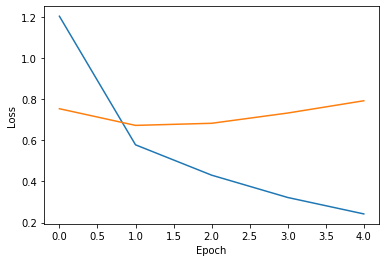

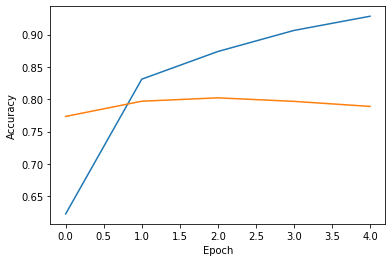

In [42]:
# 画图
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# plt.plot（result.result['val_accuracy']）
plt.ylabel('Loss')  
plt.xlabel('Epoch') 
plt.show()
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.ylabel('Accuracy')  
plt.xlabel('Epoch') 
plt.show()

In [38]:
# cnn模型
model =  Sequential()
model.add(Embedding(1000,32,input_length=50))
model.add(Conv1D(256,3,padding='same',activation='relu'))
model.add(MaxPool1D(3,3,padding='same'))
model.add(Conv1D(32,3,padding='same',activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation='softmax'))


In [41]:
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 32)            32000     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 50, 256)           24832     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 17, 256)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 17, 32)            24608     
_________________________________________________________________
flatten_10 (Flatten)         (None, 544)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 544)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 544)             

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
result_cnn = model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=2,validation_split=0.2)


Instructions for updating:
Use tf.cast instead.
Train on 35864 samples, validate on 8967 samples
Epoch 1/5
 - 28s - loss: 1.0399 - accuracy: 0.6768 - val_loss: 1.5369 - val_accuracy: 0.4869
Epoch 2/5
 - 24s - loss: 0.5811 - accuracy: 0.8303 - val_loss: 1.2025 - val_accuracy: 0.6869
Epoch 3/5
 - 25s - loss: 0.4685 - accuracy: 0.8605 - val_loss: 0.8303 - val_accuracy: 0.7764
Epoch 4/5
 - 25s - loss: 0.3806 - accuracy: 0.8844 - val_loss: 0.7129 - val_accuracy: 0.7964
Epoch 5/5
 - 26s - loss: 0.3172 - accuracy: 0.8996 - val_loss: 0.7161 - val_accuracy: 0.7937


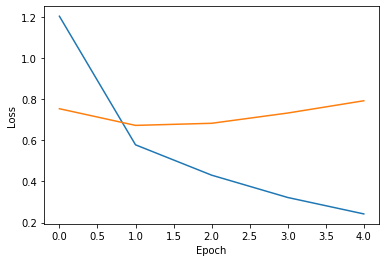

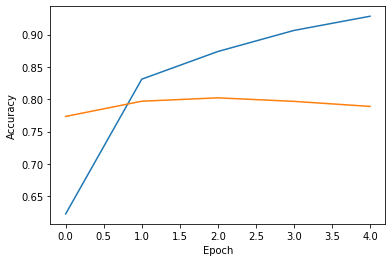

In [46]:
# 画图
import matplotlib.pyplot as plt
plt.plot(result_c.history['loss'])
plt.plot(result.history['val_loss'])

# plt.plot（result.result['val_accuracy']）
plt.ylabel('Loss')  
plt.xlabel('Epoch') 
plt.show()
plt.plot(result_cnn.history['accuracy'])
plt.plot(result_cnn.history['val_accuracy'])
plt.ylabel('Accuracy')  
plt.xlabel('Epoch') 
plt.show()

In [ ]:
# torch 
